### LOESS, LOWESS

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.filters.hp_filter import hpfilter

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

<Axes: xlabel='DATE'>

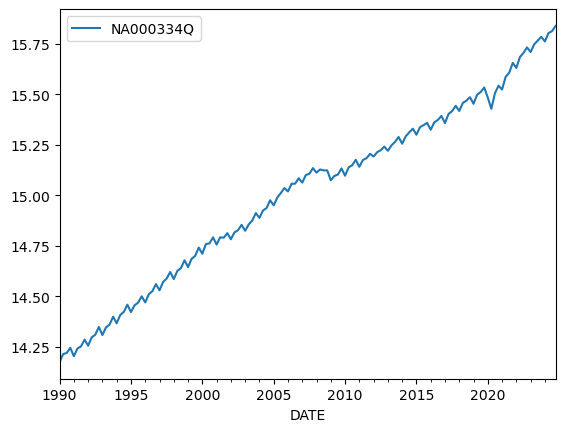

In [2]:
gdp = web.DataReader(name='NA000334Q', data_source='fred', start='1990-01-01')
y = np.log(gdp)
y.plot()

In [3]:
cycle, trend = hpfilter(y, lamb=1600)

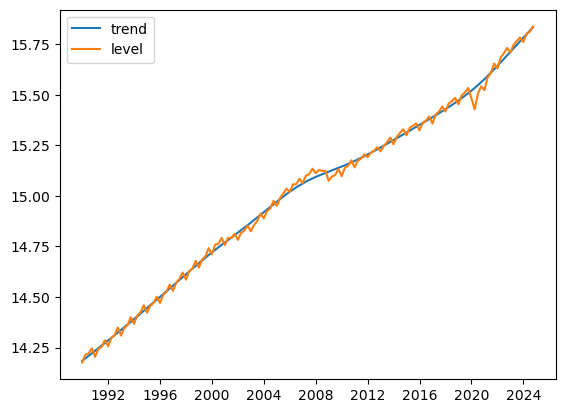

In [4]:
plt.plot(trend, label='trend')
plt.plot(y, label='level')
plt.legend()
plt.show()

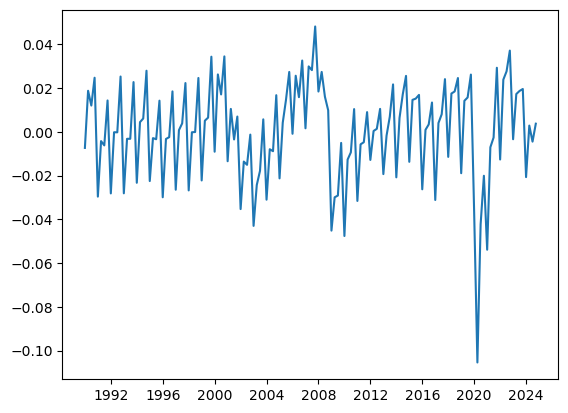

In [5]:
plt.plot(cycle)

#### STL

In [ ]:
from statsmodels.tsa.seasonal import STL

#окно seasonal - какое окно от центральной точки (4 вправо, 4 влево)
stl = STL(y, seasonal=9, )
res = stl.fit()

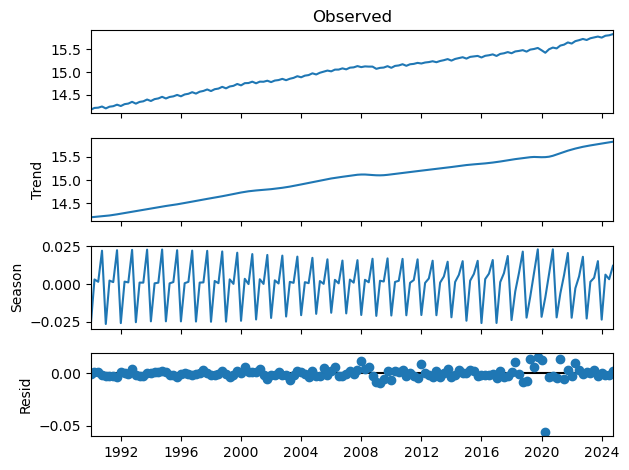

In [12]:
res.plot()
plt.show()

#### Сравнение

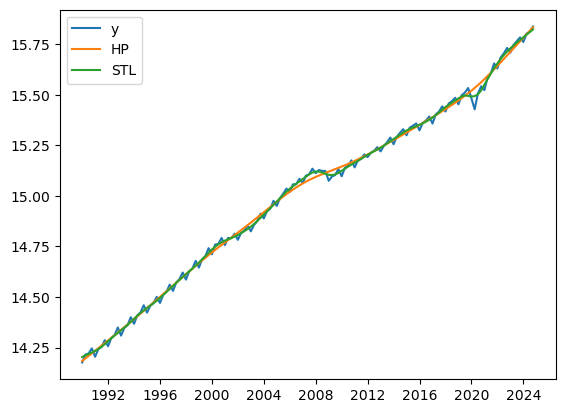

In [14]:
plt.plot(y, label='y')
plt.plot(trend, label='HP')
plt.plot(res.trend, label='STL')
plt.legend()
plt.show()

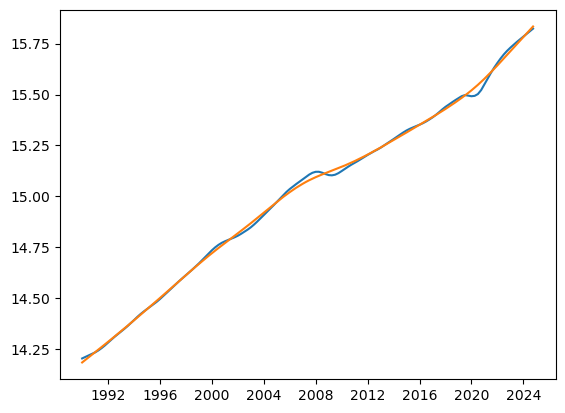

In [15]:
plt.plot(res.trend, label="STL")
plt.plot(trend, label = 'HP')
plt.show()

# Сравним три метода (SS, HP, STL)

In [16]:
from statsmodels.tsa.api import UnobservedComponents # разложение на компоненты

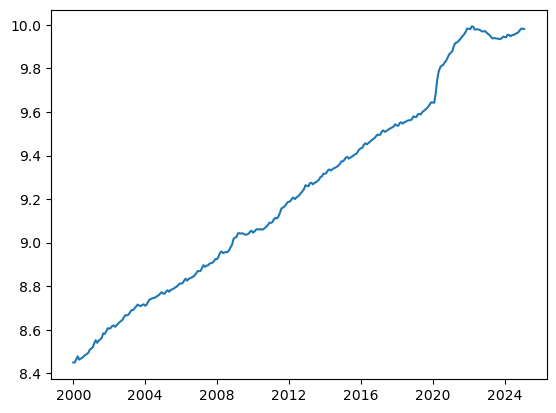

In [19]:
gdp = web.DataReader(name='M2NS', data_source='fred', start='2000-01-01')
y = np.log(gdp)
plt.plot(y)

## State Space

In [45]:
from statsmodels.tsa.api import UnobservedComponents

# Выбираем какие компоненты включить в модель
# Потом через кросс-валидацию можно определить, какая модель лучше
mod = UnobservedComponents(y, level=True, trend=True, seasonal=12, cycle=False, stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True, stochastic_cycle=False)

res_ss = mod.fit()
# res.summary()

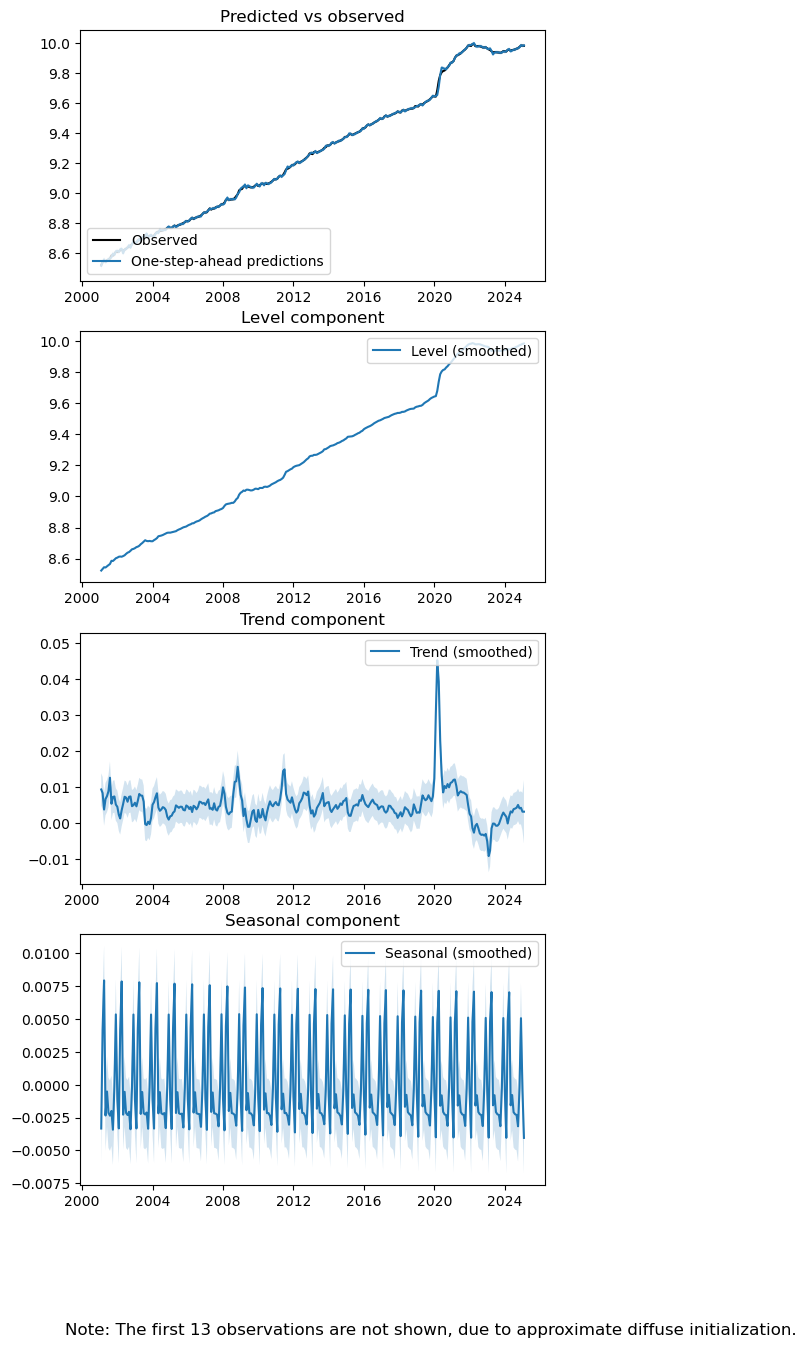

In [46]:
# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(y.shape[1]):
    fig.axes[i].legend(loc=3)

plt.show()

#### HP Filter

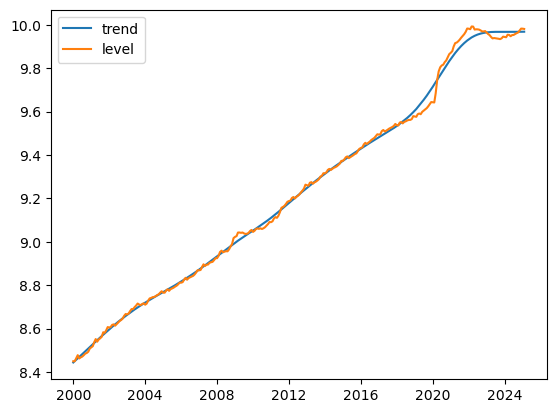

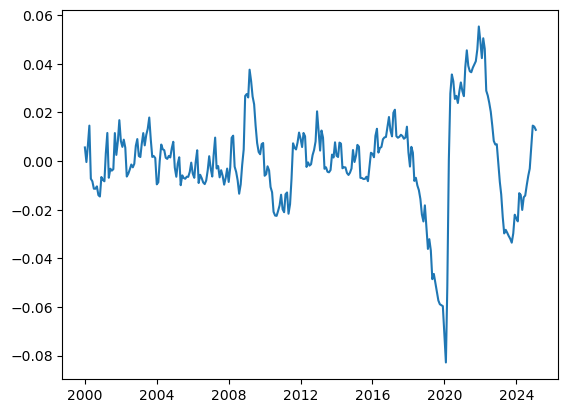

In [40]:
cycle, trend = hpfilter(y, lamb=14400)

#визуализация тренда на оригинальном наборе данных
plt.plot(trend, label='trend')
plt.plot(y, label='level')
plt.legend()
plt.show()

# циклические отклонения от тренда
plt.plot(cycle)

#### STL

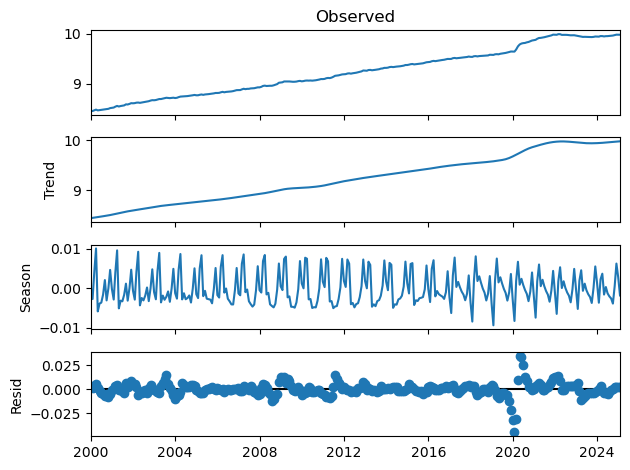

In [43]:
from statsmodels.tsa.seasonal import STL

#окно seasonal - какое окно от центральной точки (6 вправо, 6 влево)
stl = STL(y, seasonal=13)
res_stl = stl.fit()

res_stl.plot()
plt.show()

In [48]:
res_stl.seasonal

DATE
2000-01-01    0.000314
2000-02-01   -0.002748
2000-03-01    0.003954
2000-04-01    0.010115
2000-05-01   -0.005886
                ...   
2024-10-01   -0.003902
2024-11-01    0.000551
2024-12-01    0.006272
2025-01-01    0.002782
2025-02-01   -0.001830
Name: season, Length: 302, dtype: float64

In [ ]:
res_ss.level['smoothed']

array([8.45088331, 8.45351361, 8.45916238, 8.46999535, 8.46492377,
       8.46841009, 8.47343786, 8.48006488, 8.48709601, 8.4913911 ,
       8.49401241, 8.5029294 , 8.51464409, 8.52272732, 8.53310297,
       8.54414211, 8.54237622, 8.55062708, 8.55776614, 8.56486958,
       8.58561232, 8.58427103, 8.59279668, 8.60201521, 8.60597203,
       8.61171577, 8.6130894 , 8.61196315, 8.61600242, 8.6211416 ,
       8.6301196 , 8.63790612, 8.64200364, 8.65022713, 8.65975418,
       8.66227198, 8.66695756, 8.67387961, 8.67669342, 8.68258026,
       8.69243036, 8.69985704, 8.70866014, 8.71804785, 8.71338188,
       8.71197587, 8.7135563 , 8.71157293, 8.71154003, 8.71884627,
       8.72426999, 8.7316113 , 8.74368354, 8.74574359, 8.74825054,
       8.75187487, 8.75696767, 8.76145334, 8.76610585, 8.76710022,
       8.76684276, 8.76928013, 8.77087244, 8.77409551, 8.77642311,
       8.78286351, 8.78740541, 8.79118287, 8.79605845, 8.80118477,
       8.80433824, 8.80677553, 8.81292739, 8.81782092, 8.82084

#### Кросс-валидация

In [36]:
# Модули для кросс-валидации
from sktime.split import temporal_train_test_split, ExpandingWindowSplitter, SlidingWindowSplitter, SingleWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredPercentageError # Метрики MSE, MAE, MAPE

In [49]:
# HP Filter
metric = MeanAbsolutePercentageError(symmetric=True)
metric.evaluate(trend, res_stl.trend)

0.0010488488261352212